## **Universidad Peruana de Ciencias Aplicadas**

### **Curso:** Procesamiento de imágenes

### **Profesor:** Carlos Fernando Montoya Cubas

### **Ciclo:** 2024-II

### **Código: u202115844** 

### **Nombres y Apellidos: Paula Jimena Mancilla Cienfuegos** 

# Pregunta 1: Invertir imágenes (8 puntos)

Desarrolle una función en Python 3.x que reciba una imagen.

La función debe cortar la imagen en 2 mitades de manera vertical. Mantener la primera mitad en su posición y reemplazar la segunda mitad con la primera mitad invertida según el eje horizontal.

Ejemplo:

Imagen de entrada:

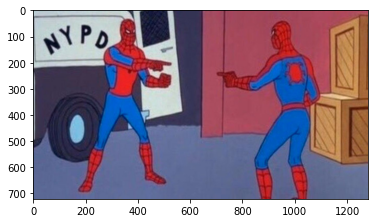

Imagen resultante:

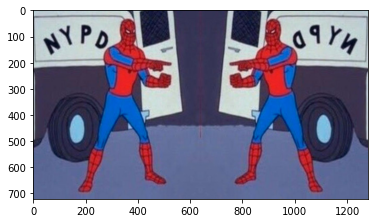


**Consideraciones:**

Algunas imágenes pueden tener ancho o alto impar.

Se recomienda el uso de slicing para resolver este ejercicio

In [7]:
!pip install pillow

In [8]:
# Desarrolle la función aquí:
def process_image(image_path):
    # Cargar la imagen
    img = Image.open(image_path)
    
    # Obtener el tamaño de la imagen
    width, height = img.size
    
    # Manejar el caso donde el ancho sea impar
    mid_width = width // 2
    
    # Cortar la imagen en dos mitades verticalmente
    left_half = img.crop((0, 0, mid_width, height))
    right_half = img.crop((mid_width, 0, width, height))
    
    # Invertir la primera mitad (izquierda) en el eje horizontal
    inverted_left_half = left_half.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Crear una nueva imagen combinando la mitad izquierda con la mitad derecha invertida
    new_img = Image.new('RGB', (width, height))
    
    # Pegar la mitad izquierda original
    new_img.paste(left_half, (0, 0))
    
    # Reemplazar la mitad derecha con la izquierda invertida
    new_img.paste(inverted_left_half, (mid_width, 0))
    
    # Mostrar la imagen procesada
    new_img.show()
    
    # Guardar la imagen procesada si se desea
    new_img.save('processed_image.jpg')


In [9]:
!curl -L -o spiderman.jpg https://sm.ign.com/ign_es/screenshot/default/spider-man-meme_cpvk.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 20 78092   20 15990    0     0  25925      0  0:00:03 --:--:--  0:00:03 26000
100 78092  100 78092    0     0   103k      0 --:--:-- --:--:-- --:--:--  104k


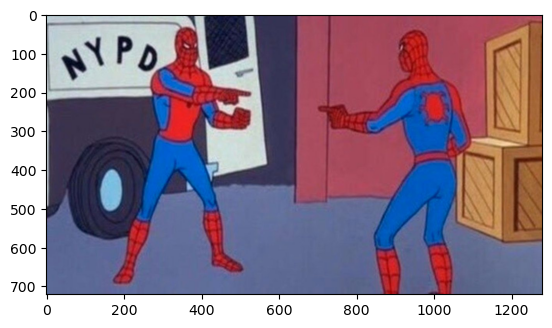

In [10]:
import matplotlib.pyplot as plt

im=plt.imread('spiderman.jpg')
plt.imshow(im)

In [11]:
# Pruebe su código aquí con la imagen en formato ndarray
process_image('spiderman.jpg')
improcessed=plt.imread('processed_image.jpg')
plt.imshow(improcessed)

NameError: name 'Image' is not defined

# Pregunta 2: Transformación Geométrica - Rotar (12 puntos)

En esta sección vamos a usar la función rotate de scikit-image. Para ver la documentación puede ver más aquí [skimage.transform.rotate](https://scikit-image.org/docs/dev/api/skimage.transform.html#rotate)

Sigue un pequeño resumen de parámetros de la función:

*   **image** - la imagen que será rotada (como un objeto `ndarray` de numpy)
*   **angle** - el ángulo a ser rotado (en sentido anti-horario) en grados **[0º-360º]**
*   **resize** - un valor booleano (`True`o `False`) indicando si el nuevo shape de la imagen seá calculado automáticamente de modo que la imagen rotada quepa exactamente. El valor por defecto es `False`. 
*   **center** - una coordenada `(cols, rows)` para indicar sobre que centro será realizada la rotación. Por defecto es el centro de la misma imagen.

**El problema a resolver**

En este problema vamos a implementar cómo se vería un reloj mecánico a una determinada hora en el formato **horas:minutos** donde horas se encuentra en el rango 0-12 y minutos en el rango 0-60. 

Comenzamos con 3 imágenes:

*   im_fondo
*   im_horas
*   im_minutos

La idea es mantener la imagen del fondo fija y rotar las imágenes de hora y minutos (usando [skimage.transform.rotate](https://scikit-image.org/docs/dev/api/skimage.transform.html#rotate)) para producir la hora deseada.  

In [9]:
#leyendo el fondo
im_fondo = imread('https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRi2ce_JcoHyh1jnYR1mjoZbNdV2eHMxgDtZsbBeop3jRGfLlHQ&usqp=CAU')
plt.imshow(im_fondo, cmap='gray')

NameError: name 'imread' is not defined

In [ ]:
def rotar(imagen, angulo, punto_rotacion):
    # Obtener las dimensiones de la imagen
    h, w, _ = imagen.shape

    # Calcular la traslación necesaria para mover el punto de rotación al centro de la imagen
    traslacion_x = punto_rotacion[0] - w / 2
    traslacion_y = punto_rotacion[1] - h / 2

    # Crear una nueva imagen donde el punto de rotación sea el centro
    imagen_trasladada = np.roll(imagen, int(traslacion_x), axis=1)
    imagen_trasladada = np.roll(imagen_trasladada, int(traslacion_y), axis=0)

    # Rotar la imagen alrededor del nuevo centro
    imagen_rotada = rotate(imagen_trasladada, angulo, reshape=False)

    # Trasladar la imagen rotada de vuelta a su posición original
    imagen_final = np.roll(imagen_rotada, -int(traslacion_x), axis=1)
    imagen_final = np.roll(imagen_final, -int(traslacion_y), axis=0)

    # Mostrar la imagen original y la rotada
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].imshow(imagen)
    axs[0].set_title('Imagen Original')

    axs[1].imshow(imagen_final)
    axs[1].set_title(f'Imagen Rotada {angulo} grados en {punto_rotacion}')

    for ax in axs:
        ax.axis('off')

    plt.show()

    return imagen_final

# Cargar una imagen de ejemplo
im_color = io.imread('/content/sample_data/cnne-1400900-image-155.png')

# Aplicar rotación
angulo = 45
punto_rotacion = (50, 75)
imagen_rotada = rotar(im_color, angulo, punto_rotacion)

In [ ]:
#creando imagen horas
im_horas = np.zeros(im_fondo.shape)
im_horas[:,:] = 255
im_horas[60:113, 110:115] = 0
plt.imshow(im_horas, cmap='gray')

In [ ]:
#creando imagen minutos
im_minutos = np.zeros(im_fondo.shape)
im_minutos[:,:] = 255
im_minutos[25:113, 110:115] = 0
plt.imshow(im_minutos, cmap='gray')

In [ ]:
#combinando las imagenes
im_reloj = np.min([im_fondo, im_horas, im_minutos], axis=0)
plt.imshow(im_reloj, cmap='gray')

In [ ]:
#@title Generar Imágen de reloj mecánico { run: "auto" }
horas = 5 #@param {type:"slider", min:0, max:12, step:1}
minutos = 38 #@param {type:"slider", min:0, max:60, step:1}

##################Modificar aquí############################
#recordar que el parametro cval=255 de rotate hace que los # 
#pixeles fuera de la imagen se conserven en blanco         #
############################################################


im_minutos_rotado = im_minutos
im_horas_rotado = im_horas



############################################################
